In [55]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [56]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [57]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [58]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [59]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [60]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [61]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [62]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [63]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [64]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [65]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [66]:
# Find the most recent date in the data set.
one_year = session.query(measurement.date).order_by(measurement.date.desc()).first()

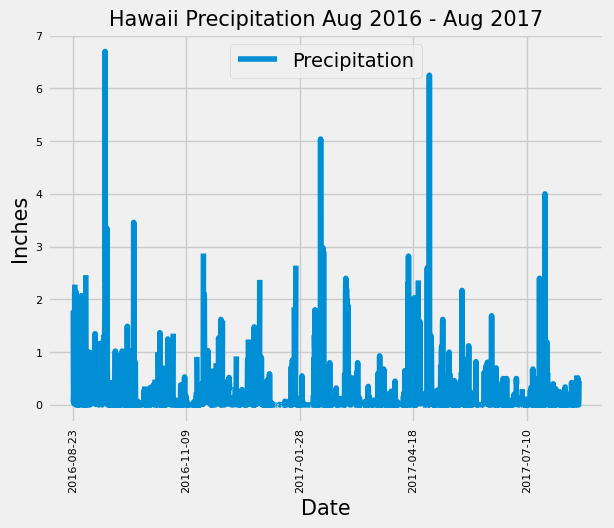

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
year_of_data = dt.date(2017,8,23)-dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.
latest_date = dt.date(year_of_data.year, year_of_data.month, year_of_data.day)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= latest_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation)

# Sort the dataframe by date
sorted_prcp = precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp.plot('date', 'prcp')

plt.xlabel("Date",  size = 15)
plt.ylabel("Inches", size = 15)
plt.title("Hawaii Precipitation Aug 2016 - Aug 2017", size = 15)
plt.legend(["Precipitation"],loc='upper center')
plt.xticks(rotation=90, size = 8)
plt.yticks(size = 8)
plt.show()


In [68]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_prcp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [69]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [70]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station)\
.order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [71]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs))\
    .filter(measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

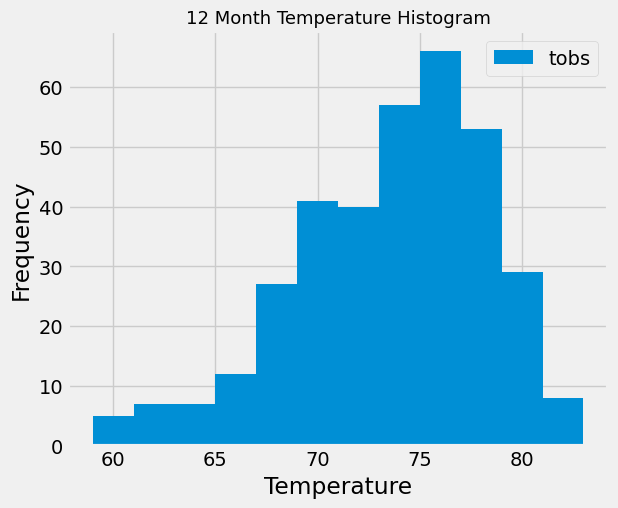

In [72]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_results = session.query(measurement.tobs).filter(measurement.station=='USC00519281')\
    .filter(measurement.date>='2016-08-23').all()

station_temp=pd.DataFrame(station_results,columns=['tobs'])
station_temp.plot.hist(bins=12)
plt.tight_layout()
plt.title("12 Month Temperature Histogram", size=13)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()


# Close Session

In [73]:
# Close Session
session.close()